### 분석

- 디시젼 트리

- 온라인 사이트 경매 데이터

- 판매여부 예측

- 변수의 영향도 확인

### Data Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/galaxy.csv')
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1179 non-null   object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [4]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


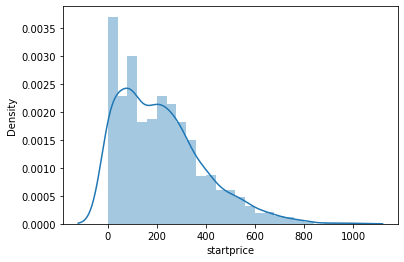

In [5]:
sns.distplot(data['startprice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


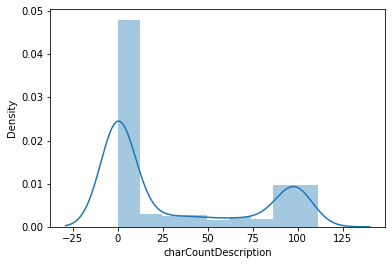

In [6]:
sns.distplot(data['charCountDescription'])

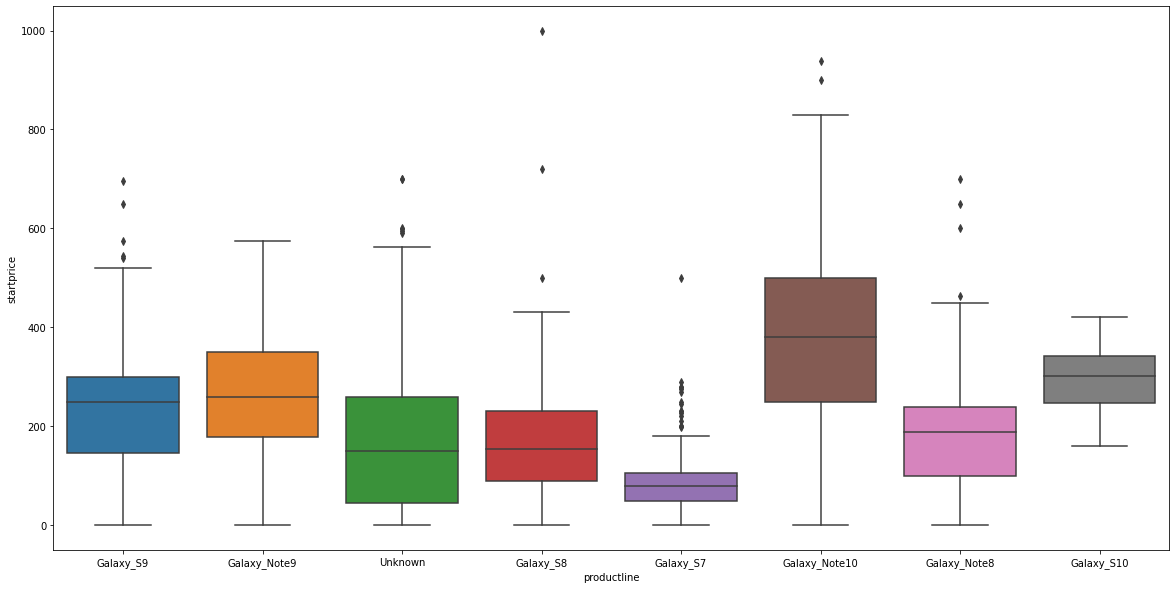

In [9]:
plt.figure(figsize=(20,10))

sns.boxplot(x='productline', y='startprice', data=data)

### Missing Value 처리

In [11]:
data.isna().sum()/ len(data)

BuyItNow                0.000000
startprice              0.000000
carrier                 0.206061
color                   0.399327
productline             0.000000
noDescription           0.000000
charCountDescription    0.000000
upperCaseDescription    0.000000
sold                    0.000000
dtype: float64

In [12]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [14]:
data = data.fillna('UnKnown')

In [15]:
data

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,UnKnown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,UnKnown,UnKnown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,UnKnown,Galaxy_S7,no description,96,2,0
1481,0,239.95,None,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,None,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,None,Midnight Black,Galaxy_S7,no description,92,2,1


In [16]:
data['carrier'].value_counts()

None               863
UnKnown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

### 함수 만들기

In [17]:
def my_func(x,y=10): #defalut값을 지정하니까 x만 넣어도 에러가 뜨지 않음
    return x+y

In [18]:
my_func(3)

13

In [19]:
my_func(3,4)

7

In [22]:
def price(x):
    if x %1 ==0:
        return x*100
    else:
        return (x+0.01) *100

In [23]:
price(99.99)

10000.0

In [25]:
#중요하다!! 시리지 함수

data['startprice'].apply(lambda a:price(a)) #한 줄 한 줄 받기

0       20000.0
1       23500.0
2       20000.0
3       17500.0
4       10000.0
         ...   
1480     8951.0
1481    23996.0
1482    33000.0
1483     8900.0
1484    12000.0
Name: startprice, Length: 1485, dtype: float64

In [26]:
data.apply(lambda x: price(x['startprice']), axis=1)

0       20000.0
1       23500.0
2       20000.0
3       17500.0
4       10000.0
         ...   
1480     8951.0
1481    23996.0
1482    33000.0
1483     8900.0
1484    12000.0
Length: 1485, dtype: float64

In [27]:
#코드 리팩토링

data['startprice'].apply(lambda x: x * 100 if x%1 ==0 else(x+0.01) *100)

0       20000.0
1       23500.0
2       20000.0
3       17500.0
4       10000.0
         ...   
1480     8951.0
1481    23996.0
1482    33000.0
1483     8900.0
1484    12000.0
Name: startprice, Length: 1485, dtype: float64

In [28]:
#elif안쓰기
data['startprice'].apply(lambda x:200 if x>200 else(100 if x>100 else 0))

0       100
1       200
2       100
3       100
4         0
       ... 
1480      0
1481    200
1482    200
1483      0
1484    100
Name: startprice, Length: 1485, dtype: int64

### 카테고리 변수 처리

In [29]:
data[['carrier','color','productline','noDescription']].nunique()

carrier          5
color            8
productline      8
noDescription    2
dtype: int64

In [30]:
data['carrier'].value_counts()

None               863
UnKnown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

In [31]:
data['color'].value_counts()

UnKnown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: color, dtype: int64

In [32]:
data['productline'].value_counts()

Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: productline, dtype: int64

In [33]:
data['noDescription'].value_counts()

contains description    856
no description          629
Name: noDescription, dtype: int64

In [34]:
# Black 종류를 하나로 통합시켜줄 함수 작성 (A)

def black(x):
    if x == 'Midnight Black':
        return 'Black'
    elif x == 'Aura Black':
        return 'Black'
    elif x == 'Prism Black':
        return 'Black'
    else:
        return x    

In [35]:
# Black 종류를 하나로 통합시켜줄 함수 작성 (B)

def black(x):
    if (x == 'Midnight Black') | (x == 'Aura Black') | (x == 'Prism Black'):        
        return 'Black'
    else:
        return x    

In [36]:
data['color'].apply(lambda x: black(x))

0            White
1          UnKnown
2          UnKnown
3       Space Gray
4       Space Gray
           ...    
1480       UnKnown
1481         Black
1482    Space Gray
1483         Black
1484         Black
Name: color, Length: 1485, dtype: object

In [37]:
# Black 종류를 하나로 통합시켜줄 함수 작성 (C)

def black(x):
    if x in ['Midnight Black','Aura Black','Prism Black']:        
        return 'Black'
    else:
        return x    

In [38]:
data['color'] = data['color'].apply(lambda x: black(x))

In [39]:
data['color'].value_counts()

UnKnown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: color, dtype: int64

In [40]:
data = pd.get_dummies(data, columns = ['carrier', 'color', 'productline', 'noDescription'])

In [41]:
data

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_AT&T,carrier_None,carrier_Sprint/T-Mobile,carrier_UnKnown,carrier_Verizon,...,productline_Galaxy_Note10,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_contains description,noDescription_no description
0,0,199.99,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,235.00,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,199.99,100,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,175.00,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,100.00,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,96,2,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1481,0,239.95,97,5,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1482,0,329.99,93,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1483,0,89.00,92,2,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### Decision Tree모델 만들기

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = data.drop('sold', axis = 1)
y = data['sold']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
model = DecisionTreeClassifier(max_depth = 10)

In [47]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

### 예측

In [48]:
pred = model.predict(X_test)

In [49]:
y_test

258     1
57      0
225     1
704     0
1096    0
       ..
44      0
1399    1
1035    0
259     1
532     1
Name: sold, Length: 297, dtype: int64

### 평가

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
accuracy_score(y_test, pred)

0.8047138047138047

### 최적의 Max Depth 찾기 (파라미터 튜닝)

In [52]:
for i in range(2, 31):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(i, round(accuracy_score(y_test, pred), 4))
    

2 0.8182
3 0.8316
4 0.8316
5 0.8249
6 0.8081
7 0.8182
8 0.8081
9 0.8013
10 0.7912
11 0.7912
12 0.7879
13 0.771
14 0.771
15 0.7677
16 0.7609
17 0.7508
18 0.7374
19 0.7441
20 0.7542
21 0.7407
22 0.7407
23 0.7542
24 0.7643
25 0.7609
26 0.7508
27 0.7441
28 0.7677
29 0.7576
30 0.7441


위의 For loop에 숫자를 2~30까지 집어넣었으므로, score에 들어있는 숫자는 i가 2,3,4,5,6,.. 일때 결과값.
즉, 최종적으로 얻은 score리스트에서 가장 큰 숫자가 index 1의 위치에 있다는것은 i가 3일 때를 의미함. 다시말해, i가 3일 때 가장 높은 스코어를 보여줌

### 최적의 Max Depth를 사용하여 다시 모델링하고 평가

In [53]:
model = DecisionTreeClassifier(max_depth = 3)

In [54]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [55]:
pred = model.predict(X_test)

In [56]:
accuracy_score(y_test, pred)


0.8316498316498316

In [57]:
confusion_matrix(y_test, pred)

array([[151,  10],
       [ 40,  96]])

### Tree plot만들기

In [58]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'BuyItNow <= 0.5\n0.497\n1188\n[638, 550]'),
 Text(0.25, 0.625, 'startprice <= 208.495\n0.357\n659\n[506, 153]'),
 Text(0.125, 0.375, 'productline_Galaxy_S9 <= 0.5\n0.442\n240\n[161, 79]'),
 Text(0.0625, 0.125, '0.43\n230\n[158, 72]'),
 Text(0.1875, 0.125, '0.42\n10\n[3, 7]'),
 Text(0.375, 0.375, 'upperCaseDescription <= 5.5\n0.291\n419\n[345, 74]'),
 Text(0.3125, 0.125, '0.319\n367\n[294, 73]'),
 Text(0.4375, 0.125, '0.038\n52\n[51, 1]'),
 Text(0.75, 0.625, 'startprice <= 142.475\n0.375\n529\n[132, 397]'),
 Text(0.625, 0.375, 'startprice <= 59.995\n0.216\n332\n[41, 291]'),
 Text(0.5625, 0.125, '0.108\n210\n[12, 198]'),
 Text(0.6875, 0.125, '0.362\n122\n[29, 93]'),
 Text(0.875, 0.375, 'productline_Galaxy_Note10 <= 0.5\n0.497\n197\n[91, 106]'),
 Text(0.8125, 0.125, '0.495\n125\n[69, 56]'),
 Text(0.9375, 0.125, '0.424\n72\n[22, 50]')]

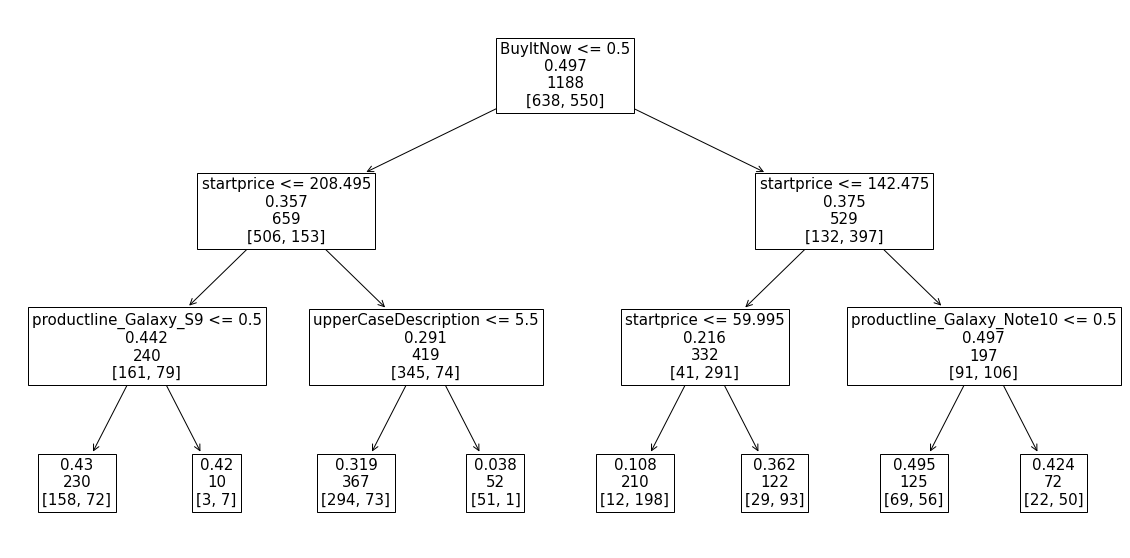

In [71]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names = X_train.columns, fontsize=15, label='None')

[Text(0.5, 0.875, 'BuyItNow <= 0.5\n0.497\n1188\n[638, 550]'),
 Text(0.25, 0.625, 'startprice <= 208.495\n0.357\n659\n[506, 153]'),
 Text(0.125, 0.375, 'productline_Galaxy_S9 <= 0.5\n0.442\n240\n[161, 79]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'upperCaseDescription <= 5.5\n0.291\n419\n[345, 74]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'startprice <= 142.475\n0.375\n529\n[132, 397]'),
 Text(0.625, 0.375, 'startprice <= 59.995\n0.216\n332\n[41, 291]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'productline_Galaxy_Note10 <= 0.5\n0.497\n197\n[91, 106]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

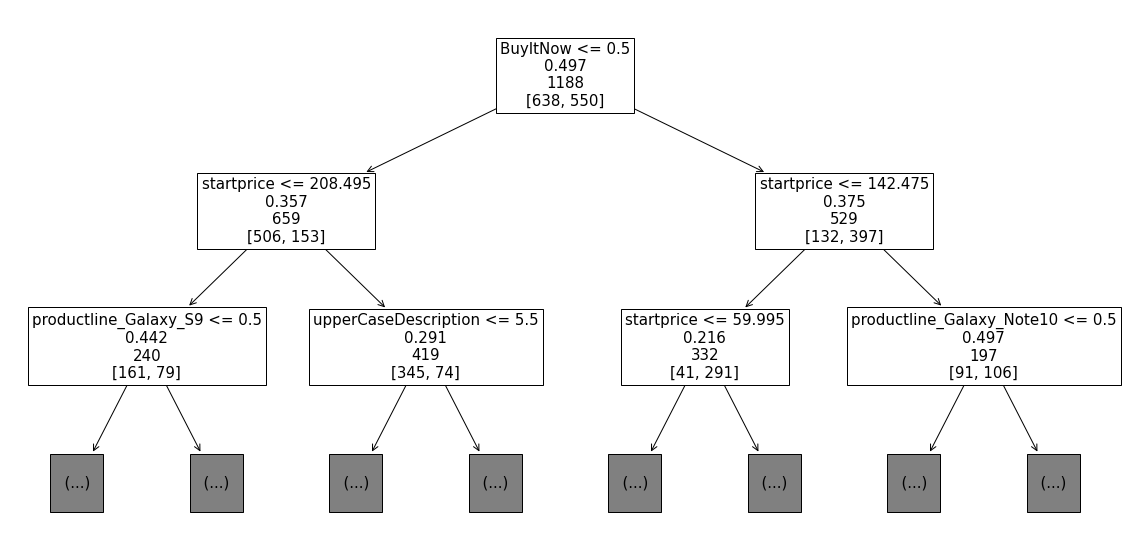

In [70]:
#depth줄이기
plt.figure(figsize=(20,10))
plot_tree(model, feature_names = X_train.columns, fontsize=15, label='None',max_depth=2)